In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

%matplotlib inline

In [2]:
base_dir = 'data/raw'
os.listdir(base_dir)

['salts_water_basic_IR_baseline.csv',
 'salts_water_basic_output_i.csv',
 'salts_water_basic_IR.csv',
 'salts_water_basic_output_s.csv',
 'salts_water_basic_OA.csv']

In [68]:
filename = 'salts_water_basic_IR.csv'
df = pd.read_csv(f'{base_dir}/{filename}')
df.head()

,4497.44979,4495.52121,4493.59263,4491.66404,4489.73546,4487.80688,4485.8783,4483.94972,4482.02114,4480.09256,...,416.57339,414.64481,412.71623,410.78765,408.85907,406.93049,405.00191,403.07333,401.14475,399.21617
0,0.00142,0.001400,0.001360,0.001350,0.00136,0.00134,0.00135,0.00140,0.00144,0.001420,...,0.53442,0.53061,0.52513,0.52670,0.53566,0.53929,0.53607,0.53915,0.54905,0.54504
1,0.00109,0.000996,0.000917,0.000957,0.00104,0.00107,0.00107,0.00109,0.00109,0.000991,...,0.52883,0.52981,0.52910,0.52873,0.53103,0.53542,0.53922,0.53902,0.53531,0.53424
2,0.00157,0.001530,0.001490,0.001440,0.00143,0.00145,0.00146,0.00148,0.00154,0.001580,...,0.54737,0.54618,0.54446,0.54205,0.53840,0.53555,0.53451,0.52978,0.52092,0.52259
3,0.00166,0.001650,0.001630,0.001600,0.00157,0.00154,0.00146,0.00137,0.00137,0.001390,...,0.53496,0.53650,0.53775,0.54071,0.54612,0.55033,0.55296,0.55570,0.55485,0.54374
4,0.00164,0.001620,0.001560,0.001550,0.00158,0.00159,0.00158,0.00156,0.00155,0.001550,...,0.53901,0.53915,0.54188,0.54435,0.54564,0.54621,0.54677,0.54823,0.54811,0.54488


In [83]:
filename = 'salts_water_basic_IR_baseline.csv'
baseline = pd.read_csv(f'{base_dir}/{filename}')
baseline.head()

,4497.45,4495.521,4493.593,4491.664,4489.735,4487.807,4485.878,4483.95,4482.021,4480.093,...,416.573,414.645,412.716,410.788,408.859,406.93,405.002,403.073,401.145,399.216
0,0.001216,0.001255,0.001312,0.001329,0.001290,0.001242,0.001226,0.001262,0.001312,0.001334,...,0.54139,0.54088,0.53923,0.53597,0.53515,0.53758,0.54182,0.54587,0.54764,0.54700
1,0.001368,0.001370,0.001389,0.001416,0.001401,0.001360,0.001302,0.001205,0.001140,0.001147,...,0.51579,0.51715,0.51693,0.51633,0.51936,0.52472,0.53113,0.53436,0.53439,0.53718
2,0.000945,0.000986,0.001008,0.000990,0.000917,0.000829,0.000750,0.000696,0.000711,0.000771,...,0.51615,0.51536,0.51290,0.50493,0.49611,0.49629,0.50712,0.52452,0.54468,0.54726
3,0.001559,0.001591,0.001539,0.001477,0.001431,0.001396,0.001386,0.001434,0.001518,0.001549,...,0.53208,0.54330,0.54833,0.53790,0.52284,0.51607,0.52012,0.52787,0.52971,0.52157
4,0.001107,0.001038,0.000991,0.001041,0.001092,0.001071,0.001079,0.001157,0.001201,0.001214,...,0.51396,0.51595,0.51140,0.50299,0.49825,0.50304,0.51313,0.52281,0.53636,0.54824


In [69]:
filename = 'salts_water_basic_output_i.csv'
outputs = pd.read_csv(f'{base_dir}/{filename}')
outputs = outputs.drop(index=[0])
outputs.index -=1
outputs = outputs.sort_index()
outputs.head()

,Zn,Cu,Li,Fe,Ni,NH4,SO4,NO3
0,0.0,0.0,0.0,0.0,0.0000,0.1452,0.05005,0.0451
1,0.0,0.0,0.0,0.0,0.0000,0.2904,0.10010,0.0902
2,0.0,0.0,0.0,0.0,0.0000,0.4356,0.15015,0.1353
3,0.0,0.0,0.0,0.0,0.0000,0.5808,0.20020,0.1804
4,0.0,0.0,0.0,0.0,0.2431,0.0000,0.24310,0.0000


In [70]:
df.shape, outputs.shape

((3744, 2126), (3744, 8))

In [71]:
x = np.array(df.columns)
x = np.apply_along_axis(lambda el: np.float64(el), 0, x)
x.shape

(2126,)

0.5557 0.000888


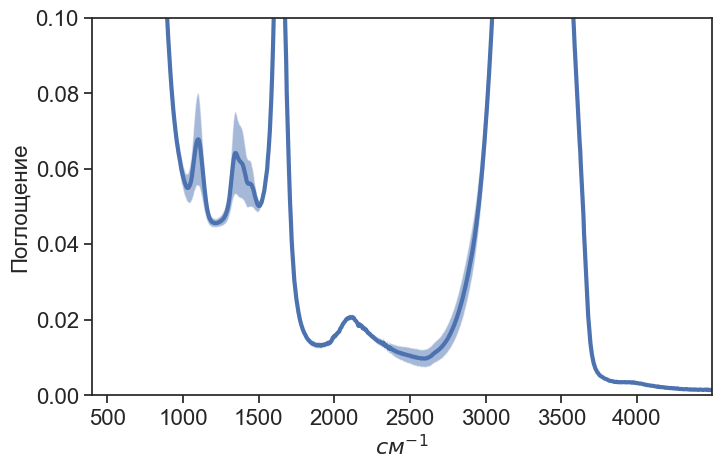

In [122]:
cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] != 0) 


y = df[cations]
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
print(y.max().max(), y.min().min())

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(x, mean, linewidth=3) 
plt.fill_between(x, y1, y2, alpha=0.5)

plt.ylim([0., 0.1])
plt.xlim([x[-1], x[0]])
#plt.legend(fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('$см^{-1}$', fontsize=16)
plt.ylabel('Поглощение', fontsize=16)

#plt.savefig('images/ir/NH4-baseline.jpeg', dpi=100, format='jpeg')
plt.show()

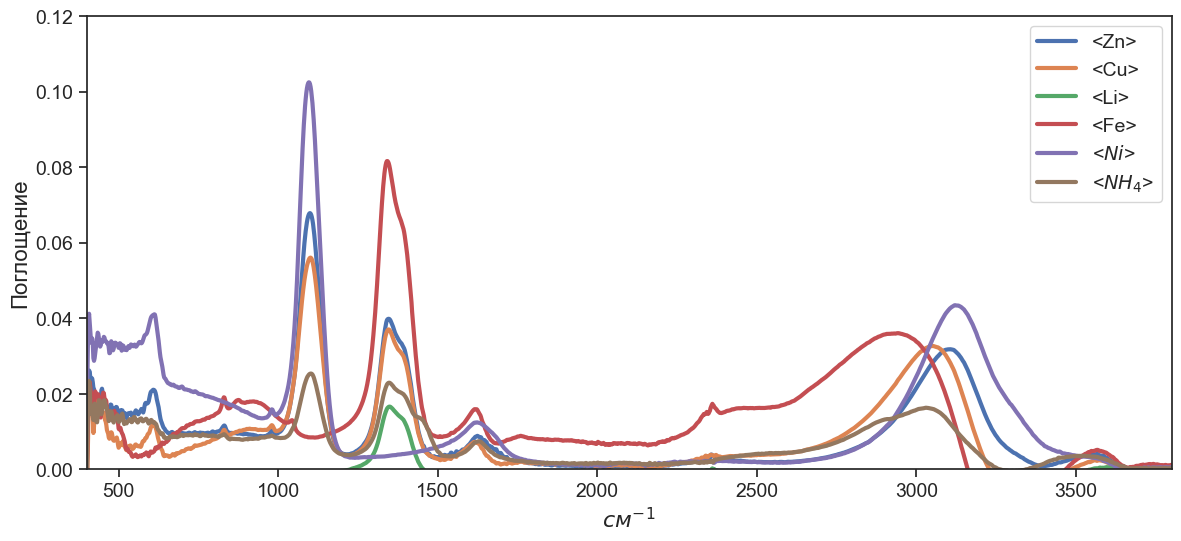

In [106]:
plt.figure(figsize=(14, 6), dpi=100)

cations = (outputs['Zn'] != 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] == 0)
y = df[cations] - baseline.mean().values
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Zn>',linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] != 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] == 0)
y = df[cations] - baseline.mean().values
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Cu>',linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] != 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] == 0)
y = df[cations] - baseline.mean().values
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Li>',linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] != 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] == 0)
y = df[cations] - baseline.mean().values
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Fe>',linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] != 0) & \
            (outputs['NH4'] == 0)
y = df[cations] - baseline.mean().values
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$Ni$>', linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

cations = (outputs['Zn'] == 0) & \
            (outputs['Cu'] == 0) & \
            (outputs['Li'] == 0) & \
            (outputs['Fe'] == 0) & \
            (outputs['Ni'] == 0) & \
            (outputs['NH4'] != 0)
y = df[cations] - baseline.mean().values
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$NH_4$>', linewidth=3) 
#plt.fill_between(x, y1, y2, alpha=0.1)

#plt.plot(x, baseline.mean(), label='$H_2O$', linewidth=2)

plt.ylim([0., 0.12])
plt.xlim([x[-1], 3800])
plt.legend(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('$см^{-1}$', fontsize=16)
plt.ylabel('Поглощение', fontsize=16)

#plt.title(f'Сравнение средних спекторов ИК однокомпонентных растворов',fontsize=18)
plt.savefig('./images/ir/solutions_comparing-baseline.jpeg', dpi=500, format='jpeg')
plt.show()

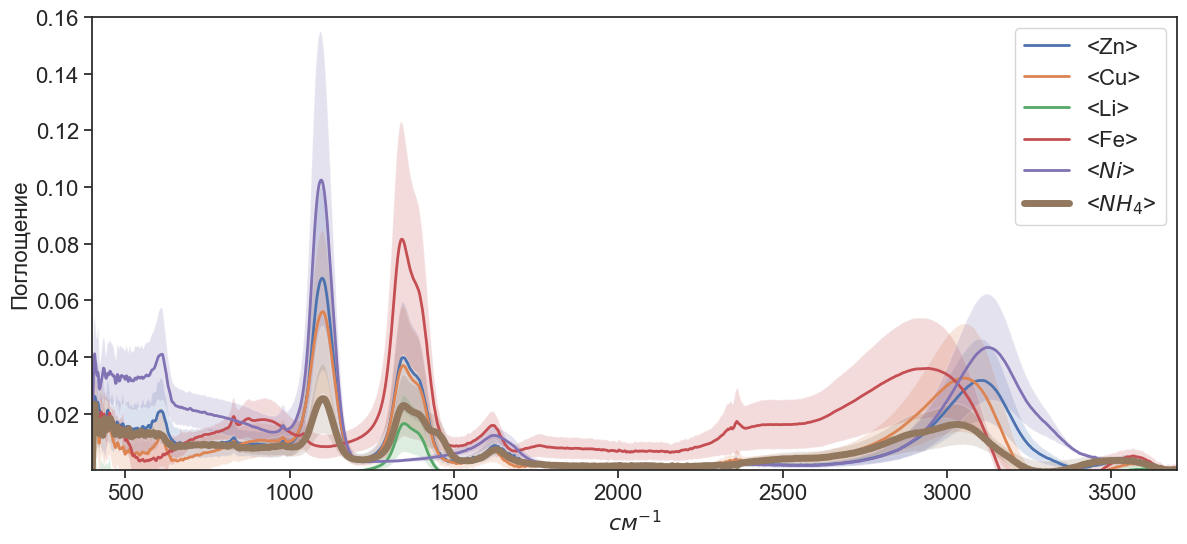

In [110]:
plt.figure(figsize=(14, 6), dpi=100)
base = baseline.mean().values

cations = (outputs['Zn'] != 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations] - base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Zn>',linewidth=2) 
plt.fill_between(x, y1, y2, alpha=0.2)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] != 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Cu>',linewidth=2) 
plt.fill_between(x, y1, y2, alpha=0.2)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] != 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Li>',linewidth=2) 
plt.fill_between(x, y1, y2, alpha=0.2)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] != 0) & (outputs['Ni'] == 0) & (outputs['NH4'] == 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<Fe>',linewidth=2) 
plt.fill_between(x, y1, y2, alpha=0.2)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] != 0) & (outputs['NH4'] == 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$Ni$>', linewidth=2) 
plt.fill_between(x, y1, y2, alpha=0.2)

cations = (outputs['Zn'] == 0) & (outputs['Cu'] == 0) & (outputs['Li'] == 0) & (outputs['Fe'] == 0) & (outputs['Ni'] == 0) & (outputs['NH4'] != 0)
y = df[cations]- base
mean = y.mean(); std = y.std()
y1 = mean - std; y2 = mean + std
plt.plot(x, mean, label='<$NH_4$>', linewidth=5) 
plt.fill_between(x, y1, y2, alpha=0.2)

#plt.plot(x, baseline.mean(), label='$H_2O$', linewidth=2)


plt.ylim([0.0001, 0.16])
plt.xlim([x[-1], 3700])
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('$см^{-1}$', fontsize=16)
plt.ylabel('Поглощение', fontsize=16)

#plt.title(f'Сравнение средних спекторов ИК однокомпонентных растворов',fontsize=18)
plt.savefig('./images/ir/solutions_comparing-baseline-1.jpeg', dpi=300, format='jpeg')
plt.show()

In [119]:
baseline.mean()

4497.45     0.001206
4495.521    0.001210
4493.593    0.001230
4491.664    0.001257
4489.735    0.001258
              ...   
406.93      0.516788
405.002     0.519528
403.073     0.525524
401.145     0.534106
399.216     0.538770
Length: 2126, dtype: float64